In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("hotel_bookings_data.csv", delimiter = ',')
pd.options.display.max_columns = None

In [150]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


Setiap baris mencerminkan satu kali transaksi dan ada 119390 baris dan 30 kolom

# **Tugas 1**

### **Handle Missing Value**

In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [151]:
data_null = ['children','city', 'agent', 'company']
for col in data_null:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom children:
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Value count kolom city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 178, dtype: int64

Value count kolom agent:
9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

Value count kolom company:
0.0      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: co

**Data Imputation**

In [6]:
data['children'] = data['children'].fillna(0)
data['city'] = data['city'].fillna('unknown')
data['agent'] = data['agent'].fillna(0)
data['company'] = data['company'].fillna(0)

Data Imputation berdasarkan distribusi variabel maka akan dilakukan:
- `children` : Imputasi menggunakan 0 karena menandakan tidak ada anak dalam pemesanan hotel
- `city` : Imputasi menggunakan unknown karena customer tidak diketahui dari kota mana 
- `agent` : Imputasi menggunakan 0 sebagai "undefined" value, mengapa angka 0? karena pada agent tidak terdapat angka 0 (minimum value agent: 1)
- `company` : Imputasi menggunakan 0 sebagai "undefined" value, mengapa angka 0? karena pada company tidak terdapat angka 0 (maksimum value company: 6)

### **Feature Engineering**

In [7]:
data['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [8]:
data['meal'] = data['meal'].replace(['Undefined'], ['No Meal'])

### **Handle Unwanted Data**

In [9]:
data['guest'] = data['adults'] + data['children'] + data['babies']
data_preprocessing = data[data['guest'] > 0].copy()

In [10]:
df1 = data_preprocessing.copy()

# **Tugas 2**

### **Agregate Table**

**Jumlah Pemesanan Hotel Setiap Bulannya Berdasarkan Jenis Hotel**

In [11]:
df1_agg = df1.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1_agg.columns = ['hotel_type', 'arrival_month', 'num_year', 'num_booking'] # mengubah nama kolom tabel
df1_agg

,hotel_type,arrival_month,num_year,num_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


**Mencari rata-rata booking tiap bulan**

In [12]:
df1_agg['average_num_booking'] = round(df1_agg['num_booking']/df1_agg['num_year'])
df1_agg.head()

,hotel_type,arrival_month,num_year,num_booking,average_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0


**Membuat kolom bulan**

In [13]:
df1_agg['bulan'] = np.where(df1_agg['arrival_month'] == 'January', 'Jan',
    np.where(df1_agg['arrival_month'] == 'February', 'Feb',
        np.where(df1_agg['arrival_month'] == 'March', 'Mar',
            np.where(df1_agg['arrival_month'] == 'April', 'Apr',
                np.where(df1_agg['arrival_month'] == 'May', 'May',
                    np.where(df1_agg['arrival_month'] == 'June', 'Jun',
                        np.where(df1_agg['arrival_month'] == 'July', 'Jul',
                            np.where(df1_agg['arrival_month'] == 'August', 'Aug',
                                np.where(df1_agg['arrival_month'] == 'September', 'Sep',
                                    np.where(df1_agg['arrival_month'] == 'October', 'Oct',
                                        np.where(df1_agg['arrival_month'] == 'November', 'Nov',
                                            np.where(df1_agg['arrival_month'] == 'December', 'Dec', 0))))))))))))
df1_agg

,hotel_type,arrival_month,num_year,num_booking,average_num_booking,bulan
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan
5,City Hotel,July,2,8221,4110.0,Jul
6,City Hotel,June,2,7469,3734.0,Jun
7,City Hotel,March,2,3730,1865.0,Mar
8,City Hotel,May,2,6434,3217.0,May
9,City Hotel,November,2,7392,3696.0,Nov


**Mengurutkan**

In [14]:
ordered_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df1_agg["bulan"] = pd.Categorical(df1_agg["bulan"], categories=ordered_months, ordered=True)
df1_agg

,hotel_type,arrival_month,num_year,num_booking,average_num_booking,bulan
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan
5,City Hotel,July,2,8221,4110.0,Jul
6,City Hotel,June,2,7469,3734.0,Jun
7,City Hotel,March,2,3730,1865.0,Mar
8,City Hotel,May,2,6434,3217.0,May
9,City Hotel,November,2,7392,3696.0,Nov


### **Plot Jumlah Pemesanan Hotel Setiap Bulannya Berdasarkan Jenis Hotel**

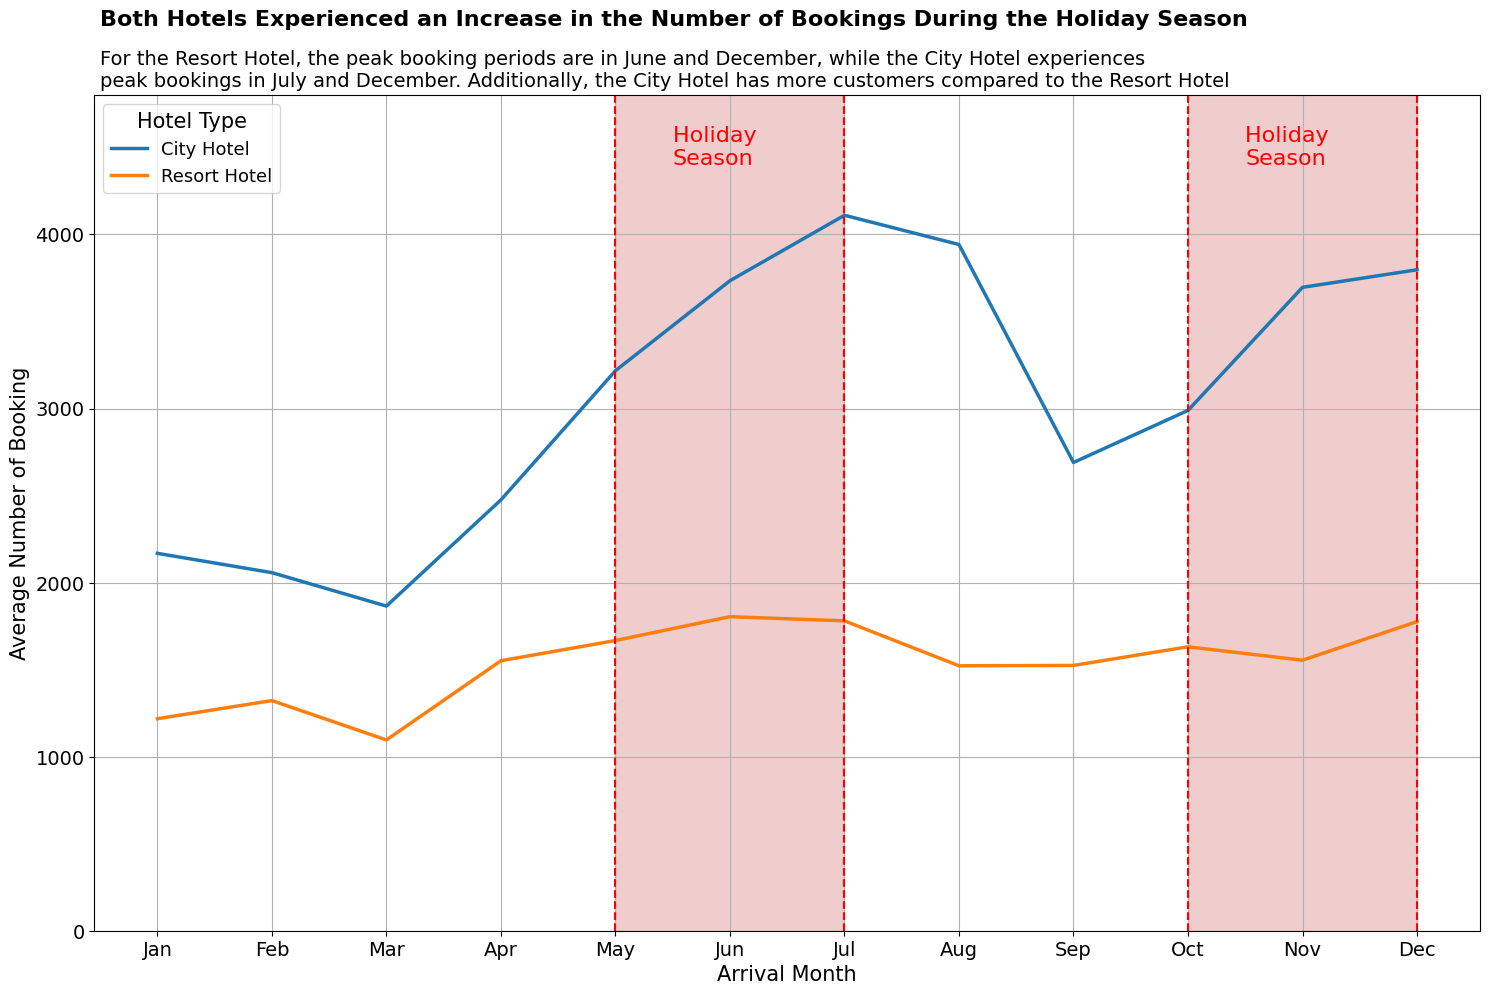

In [19]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.lineplot(x='bulan', y='average_num_booking', hue='hotel_type', 
             size="hotel_type", sizes=(2.5, 2.5), data=df1_agg) # plot awal menggunakan lineplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Arrival Month', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Average Number of Booking', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 4800) # membatasi y axis

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada

plt.text(x=-0.5, y=5200, s="Both Hotels Experienced an Increase in the Number of Bookings During the Holiday Season", 
         fontsize=16, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=4850, s="For the Resort Hotel, the peak booking periods are in June and December, while the City Hotel experiences \npeak bookings in July and December. Additionally, the City Hotel has more customers compared to the Resort Hotel", 
         fontsize=14) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.savefig('fig/investigate_hotel_business_v01.png', dpi=200); # menyimpan gambar

### **Interpretasi**

Dari Plot diatas dapat diketahui bahwa, Kedua Hotel mengalami kenaikan jumlah booking Selama Musim Liburan. Untuk Resort Hotel, kenaikan puncak booking adalah bulan juni dan desember sedangkan untuk City Hotel mengalami kenaikan puncak booking selama bulan juli dan desember. Selain itu, City Hotel juga memiliki lebih banyak pelanggan dibanding Resort Hotel. 

From the above plot, it can be observed that both hotels experienced an increase in the number of bookings during the holiday season. For the Resort Hotel, the peak booking periods are in June and December, while the City Hotel experiences peak bookings in July and December. Additionally, the City Hotel has more customers compared to the Resort Hotel.

# **Tugas 3**

### **Add New Column**

In [21]:
df2 = data_preprocessing.copy()

<AxesSubplot: xlabel='total_menginap', ylabel='Count'>

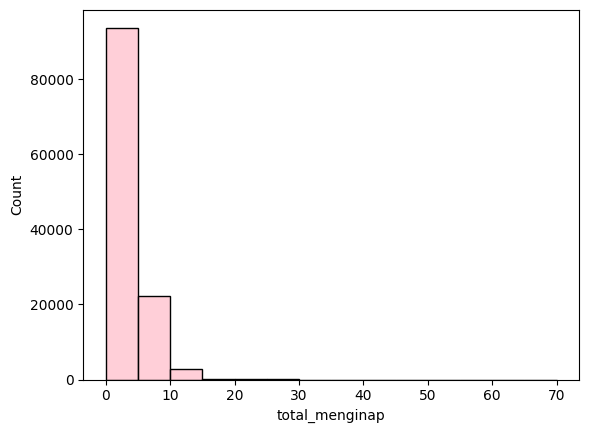

In [22]:
df2['total_menginap'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']

sns.histplot(data=df2, x="total_menginap", binwidth=5, color="pink")

Dari Grafik diatas dapat diketahui bahwa Jumlah menginap lebih banyak pada kisaran 0-15 hari, untuk itu akan dilakukan kategori untuk setiap jumlah hari dibawah 10 hari, dan untuk diatas 10 hari akan dilakukan kategori 10 - 15 hari, sedangkan diatas 15 hari akan dilakukan kategori > 15 hari

### **Add and Categorize the New Column**

In [26]:
# pengelompokkan data berdasarkan hasil pengamatan distribusi data
df2['durasi_menginap'] = np.where(df2['total_menginap'] > 15, 15, 
                                       np.where(df2['total_menginap'] > 9, 10, df2['total_menginap']))
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_menginap,durasi_menginap
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2


### **Agregate Table**

In [28]:
df2_gr = df2.groupby(['hotel', 'is_canceled', 'durasi_menginap'])['arrival_date_month'].count().reset_index(name='num_bookings')
df2_gr.head()

,hotel,is_canceled,durasi_menginap,num_bookings
0,City Hotel,0,0,251
1,City Hotel,0,1,9155
2,City Hotel,0,2,10983
3,City Hotel,0,3,11889
4,City Hotel,0,4,7694


**Jumlah Pemesanan Hotel Yang Dibatalkan Terhadap Durasi Menginap Untuk Setiap Jenis Hotel**

In [31]:
df2_pivot = df2_gr.pivot_table(index=['hotel', 'durasi_menginap'], columns='is_canceled', values='num_bookings').reset_index()
df2_pivot

is_canceled,hotel,durasi_menginap,0,1
0,City Hotel,0,251,13
1,City Hotel,1,9155,4103
2,City Hotel,2,10983,10432
3,City Hotel,3,11889,9482
4,City Hotel,4,7694,4853
5,City Hotel,5,3210,1775
6,City Hotel,6,1111,938
7,City Hotel,7,1245,808
8,City Hotel,8,205,176
9,City Hotel,9,119,93


**Dicari Persen Canceled**

In [32]:
df2_pivot['pct_canceled'] = round(df2_pivot[1]*100.0/(df2_pivot[0]+df2_pivot[1]), 2)
df2_pivot.head()

is_canceled,hotel,durasi_menginap,0,1,pct_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68


In [123]:
print(df2_pivot[['durasi_menginap', 'pct_canceled', 'hotel']].dtypes)

is_canceled
durasi_menginap      int64
pct_canceled       float64
hotel               object
dtype: object


### **Plot Jumlah Pemesanan Hotel Yang Dibatalkan Terhadap Durasi Menginap Untuk Setiap Jenis Hotel**

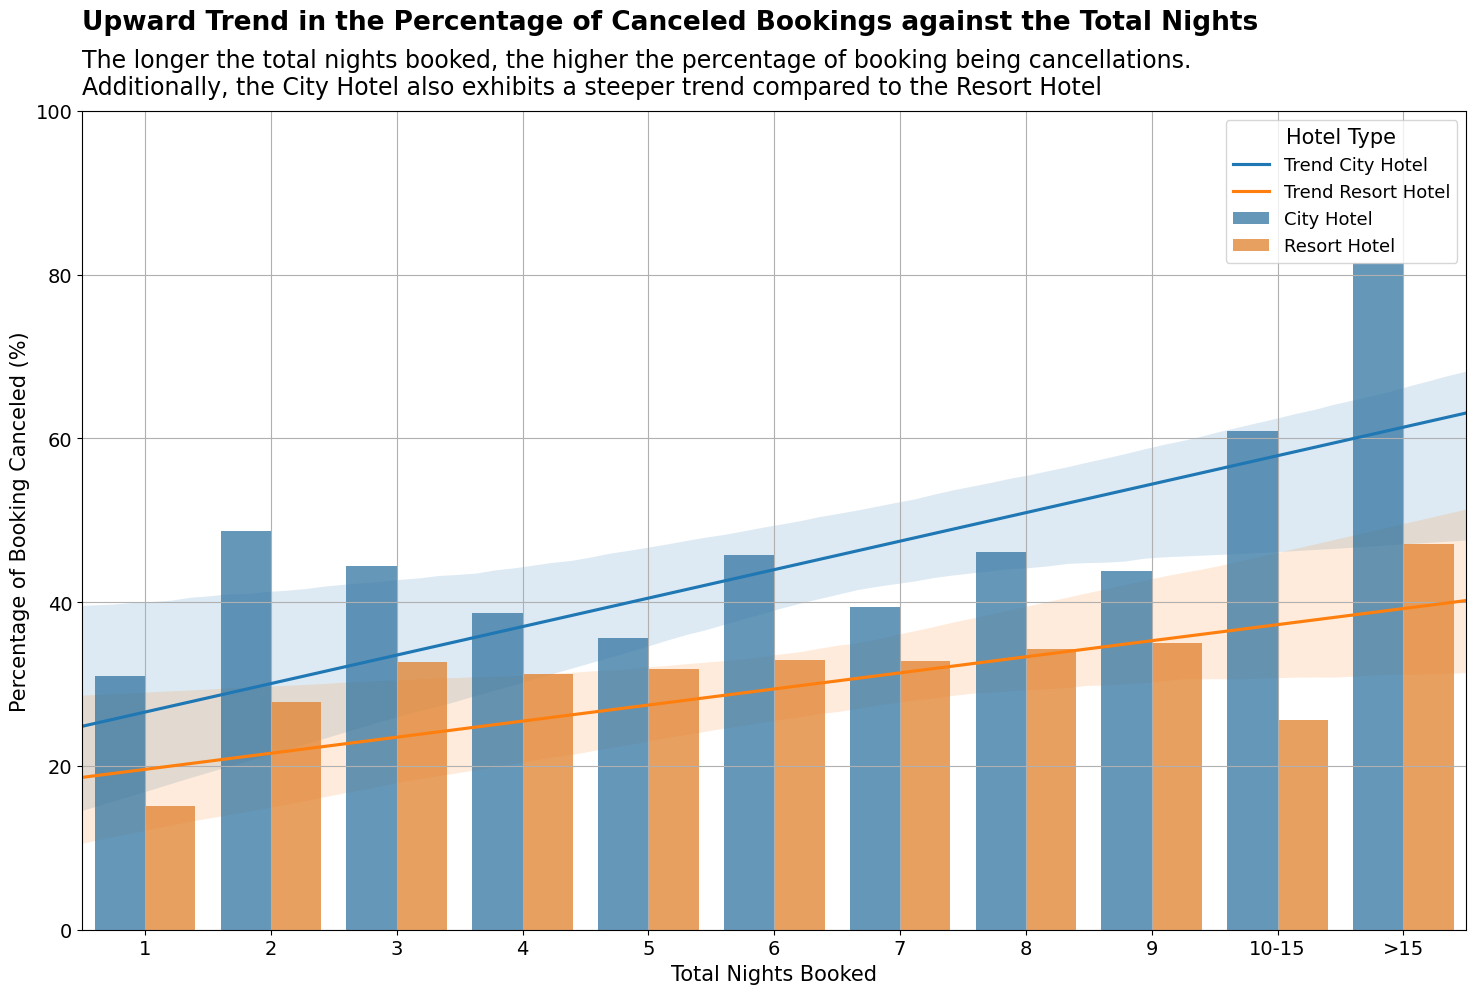

In [65]:
plt.figure(figsize=(15,10))
sns.regplot(x='durasi_menginap', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='durasi_menginap', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='durasi_menginap', y='pct_canceled', hue='hotel', data=df2_pivot, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xticks(range(0,12,1), labels=[str(x) for x in range(0,10,1)]+["10-15",">15"]) # mengatur customized-label pada x-axis
plt.xlabel('Total Nights Booked', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 100) # membatasi y axis
plt.xlim(0.5, 11.5) # membatasi x axis

plt.text(x=0.5, y=110, s="Upward Trend in the Percentage of Canceled Bookings against the Total Nights", 
         fontsize=19, fontweight='bold') # memberikan judul yang informatif
plt.text(x=0.5, y=102, s="The longer the total nights booked, the higher the percentage of booking being cancellations. \nAdditionally, the City Hotel also exhibits a steeper trend compared to the Resort Hotel", 
         fontsize=17) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.savefig('fig/investigate_hotel_business_v02.png', dpi=200); # menyimpan gambar

### **Interpretasi**

Dari grafik diatas dapat diketahui bahwa terdapat Tren Kenaikan pada Persentase Pemesanan yang Dibatalkan terhadap Total Malam. Semakin lama total malam yang dipesan, semakin tinggi persentase pembatalan pemesanan. Selain itu City Hotel juga memiliki tren yang lebih curam dibandingkan dengan Resort Hotel

From the above graph, it can be observed that there is an upward trend in the percentage of canceled bookings against the total nights. The longer the total nights booked, the higher the percentage of booking cancellations. Additionally, the City Hotel also exhibits a steeper trend compared to the Resort Hotel.

# **Tugas 4**

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

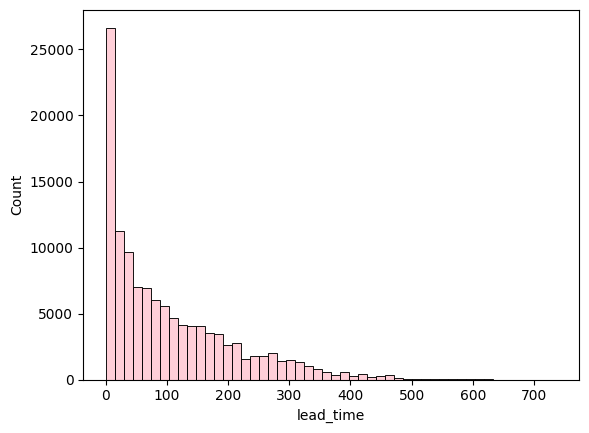

In [124]:
df3 = data_preprocessing.copy() 

sns.histplot(data=df3, x="lead_time", bins=50, color="pink")

Dari Grafik diatas dapat diketahui bahwa Persebaran data pada kolom lead_time berkisar antara 0 - 600+, sehingga akan dibuat pengelompokan setiap 30 hari

### **Add and Categorize the New Column**

In [125]:
df3['lead_times'] = np.where(df3['lead_time'] > 400, 401, df3['lead_time'])
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,lead_times
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,342
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,401
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,7
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,13
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,14


In [126]:
bins = list(np.arange(0,max(df3['lead_times'])+30, 30))
bins

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]

In [127]:
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
labels

['0-30',
 '30-60',
 '60-90',
 '90-120',
 '120-150',
 '150-180',
 '180-210',
 '210-240',
 '240-270',
 '270-300',
 '300-330',
 '330-360',
 '360-390',
 '390-420']

In [128]:
df3['lead_time_group'] = pd.cut(df3['lead_times'],bins=bins, include_lowest=True, labels=labels)
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,lead_times,lead_time_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,342,330-360
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,401,390-420
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,7,0-30
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,13,0-30
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,14,0-30


### **Agregate Table Jumlah Pemesanan Hotel Yang Dibatalkan Terhadap Jarak Waktu Pemesanan Untuk Setiap Jenis Hotel**

In [138]:
df3_agg = df3.groupby(['hotel', 'lead_time_group', 'is_canceled']).size().unstack(fill_value=0).reset_index()
df3_agg.head()

is_canceled,hotel,lead_time_group,0,1
0,City Hotel,0-30,18060,5184
1,City Hotel,30-60,7266,4608
2,City Hotel,60-90,5210,3692
3,City Hotel,90-120,3956,3486
4,City Hotel,120-150,3064,2542


In [139]:
df3_agg.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df3_agg.head()

,hotel_type,lead_time_group,not_canceled,canceled
0,City Hotel,0-30,18060,5184
1,City Hotel,30-60,7266,4608
2,City Hotel,60-90,5210,3692
3,City Hotel,90-120,3956,3486
4,City Hotel,120-150,3064,2542


In [140]:
df3_agg['all_bookings'] = df3_agg['not_canceled']+df3_agg['canceled']
df3_agg.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings
0,City Hotel,0-30,18060,5184,23244
1,City Hotel,30-60,7266,4608,11874
2,City Hotel,60-90,5210,3692,8902
3,City Hotel,90-120,3956,3486,7442
4,City Hotel,120-150,3064,2542,5606


In [141]:
df3_agg['pct_canceled'] = df3_agg['canceled']*100.0/(df3_agg['all_bookings'])
df3_agg.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5184,23244,22.302530
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274


### **Plot Jumlah Pemesanan Hotel Yang Dibatalkan Terhadap Jarak Waktu Pemesanan Untuk Setiap Jenis Hotel**

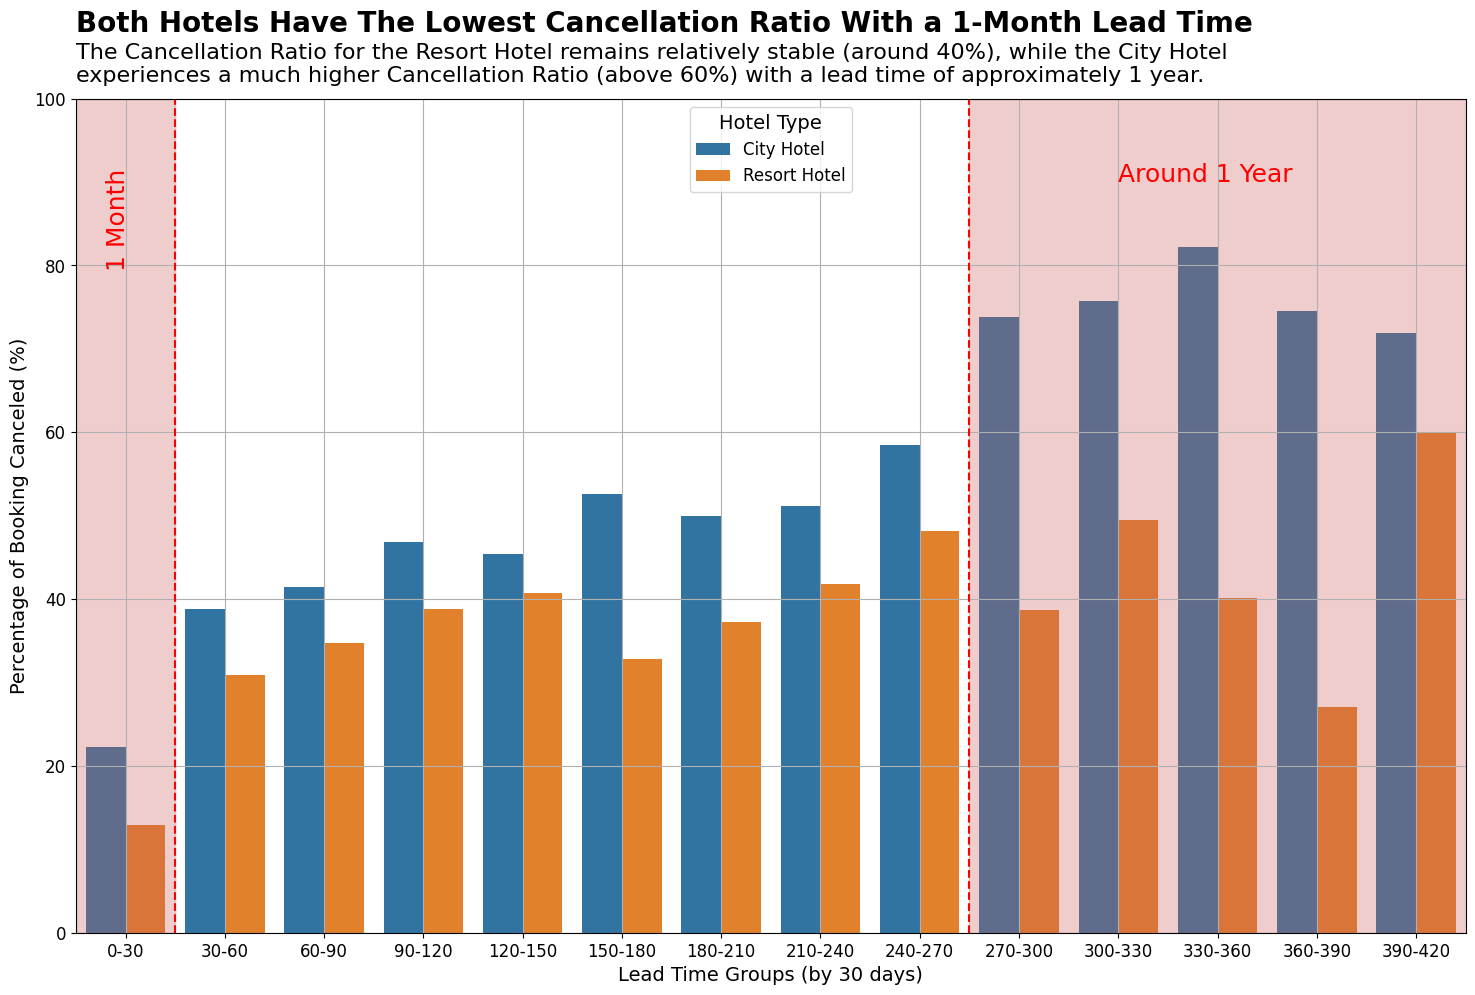

In [147]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df3_agg) # plot awal menggunakan barplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=12) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) # mengatur title pada y-axis 
plt.ylim(0, 100) # membatasi y-axis
plt.xlim(-0.5,13.5) # membatasi x-axis

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(8.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=108, s="Both Hotels Have The Lowest Cancellation Ratio With a 1-Month Lead Time", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="The Cancellation Ratio for the Resort Hotel remains relatively stable (around 40%), while the City Hotel \nexperiences a much higher Cancellation Ratio (above 60%) with a lead time of approximately 1 year.", 
         fontsize=16) # memberikan keterangan tambahan atas judul
 
plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.savefig('fig/investigate_hotel_business_v03.png', dpi=200); # menyimpan gambar

### **Interpretasi**

Dari grafik diatas dapat diketahui bahwa Kedua hotel tersebut memiliki rasio pembatalan terendah dengan lead time 1 bulan. Selain itu, Rasio pembatalan untuk Resort Hotel relatif stabil (sekitar 40%), sedangkan City Hotel mengalami rasio pembatalan yang jauh lebih tinggi (di atas 60%) dengan waktu tunggu sekitar 1 tahun.

From the above graph, it can be observed that both hotels have the lowest cancellation ratio with a 1-month lead time. Additionally, the cancellation ratio for the Resort Hotel remains relatively stable (around 40%), while the City Hotel experiences a much higher cancellation ratio (above 60%) with a lead time of approximately 1 year.